
### About Dataset

Dataset contains information about flight booking options from the website Easemytrip for flight travel between India's top 6 metro cities. There are 300261 datapoints and 11 features in the cleaned dataset. Data was collected for 50 days, from February 11th to March 31st, 2022. Data source was secondary data and was collected from Ease my trip website.


### Features

The various features of the cleaned dataset are explained below:
1. *Airline*: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.
2. *Flight*: Flight stores information regarding the plane's flight code. It is a categorical feature.
3. *Source City*: City from which the flight takes off. It is a categorical feature having 6 unique cities.
4. *Departure Time*: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.
5. *Stops*: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.
6. *Arrival Time*: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.
7. *Destination City*: City where the flight will land. It is a categorical feature having 6 unique cities.
8. *Class*: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.
9. *Duration*: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.
10. *Days Left*: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.
11. *Price*: Target variable stores information of the ticket price.

### import libaries

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('whitegrid')


### import dataset

In [2]:
df = pd.read_csv('E:\Data Science\MLops with Towhid Bhai\week-1 EDA in vscode\data\Clean_Dataset.csv')
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
# check missing value
df.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB



<p> </b>note: There is no missing value </b </p>

In [5]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,300153.0,150076.000000,86646.852011,0.00,75038.00,150076.00,225114.00,300152.00
duration,300153.0,12.221021,7.191997,0.83,6.83,11.25,16.17,49.83
days_left,300153.0,26.004751,13.561004,1.00,15.00,26.00,38.00,49.00
price,300153.0,20889.660523,22697.767366,1105.00,4783.00,7425.00,42521.00,123071.00


### Data Frequency

1. related top frequency of each column catergory variable
2. for contineous variable, we can see mean, std, Quantile (Q1, Q2, Q3), max, outlier

In [6]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,300153.0,NaN,NaN,NaN,150076.0,86646.852011,0.0,75038.0,150076.0,225114.0,300152.0
airline,300153,6,Vistara,127859,NaN,NaN,NaN,NaN,NaN,NaN,NaN
flight,300153,1561,UK-706,3235,NaN,NaN,NaN,NaN,NaN,NaN,NaN
source_city,300153,6,Delhi,61343,NaN,NaN,NaN,NaN,NaN,NaN,NaN
departure_time,300153,6,Morning,71146,NaN,NaN,NaN,NaN,NaN,NaN,NaN
stops,300153,3,one,250863,NaN,NaN,NaN,NaN,NaN,NaN,NaN
arrival_time,300153,6,Night,91538,NaN,NaN,NaN,NaN,NaN,NaN,NaN
destination_city,300153,6,Mumbai,59097,NaN,NaN,NaN,NaN,NaN,NaN,NaN
class,300153,2,Economy,206666,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,300153.0,NaN,NaN,NaN,12.221021,7.191997,0.83,6.83,11.25,16.17,49.83


In [7]:
df.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

### Checking Distribution based on ticket price 

### hisplot plot

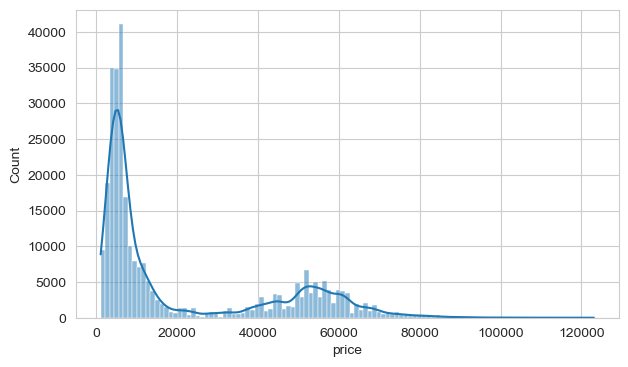

In [8]:
plt.figure(figsize = (7,4))
sns.histplot( x = 'price', data = df, kde = True)
plt.show()

#### Economy class distribution


In [9]:
df['class'].value_counts()

Economy     206666
Business     93487
Name: class, dtype: int64

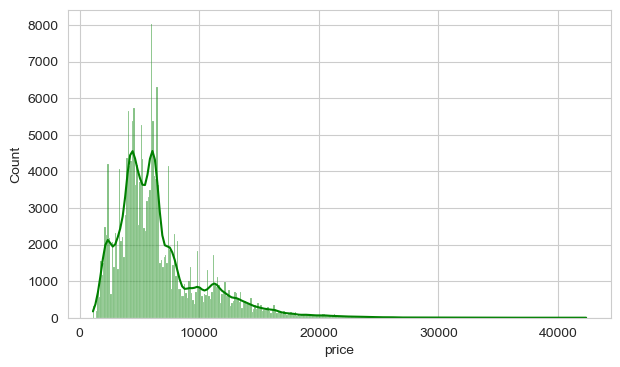

In [11]:
plt.figure(figsize=(7,4))
sns.histplot( x = 'price', data = df[df['class']=='Economy'], kde = True, color='green')
plt.show()

#### Business Class Distribution

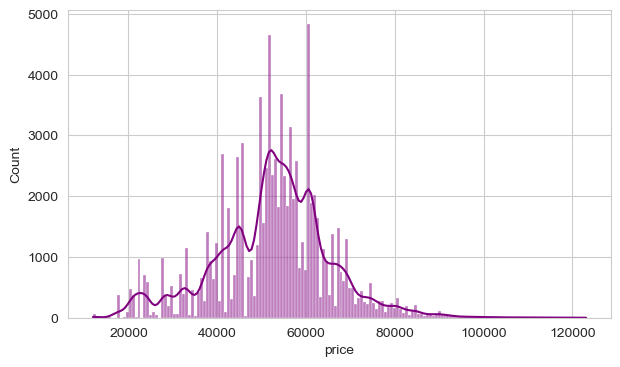

In [12]:
plt.figure(figsize=(7,4))
sns.histplot(x="price", data = df[df['class'] != "Economy"], kde = True, color='purple')
plt.show()

In [13]:
print('average price of all class: {}'.format(df.price.mean()))
print('average price of economy class class: {}'.format(df[df['class'] == 'Economy'].price.mean()))
print('average price of business class class: {}'.format(df[df['class'] != 'Economy'].price.mean()))
print('= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = ')
print('median price of all class: {}'.format(df.price.median()))
print('median price of economy class class: {}'.format(df[df['class'] == 'Economy'].price.median()))
print('median price of business class class: {}'.format(df[df['class'] != 'Economy'].price.median()))

average price of all class: 20889.660523133203
average price of economy class class: 6572.342383362527
average price of business class class: 52540.08112357868
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
median price of all class: 7425.0
median price of economy class class: 5772.0
median price of business class class: 53164.0


<p> <b> Here mean value of the price is 20889.66 and median is 7425 </b> <p>

### Countplot over Categorical Value

In [14]:
df.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

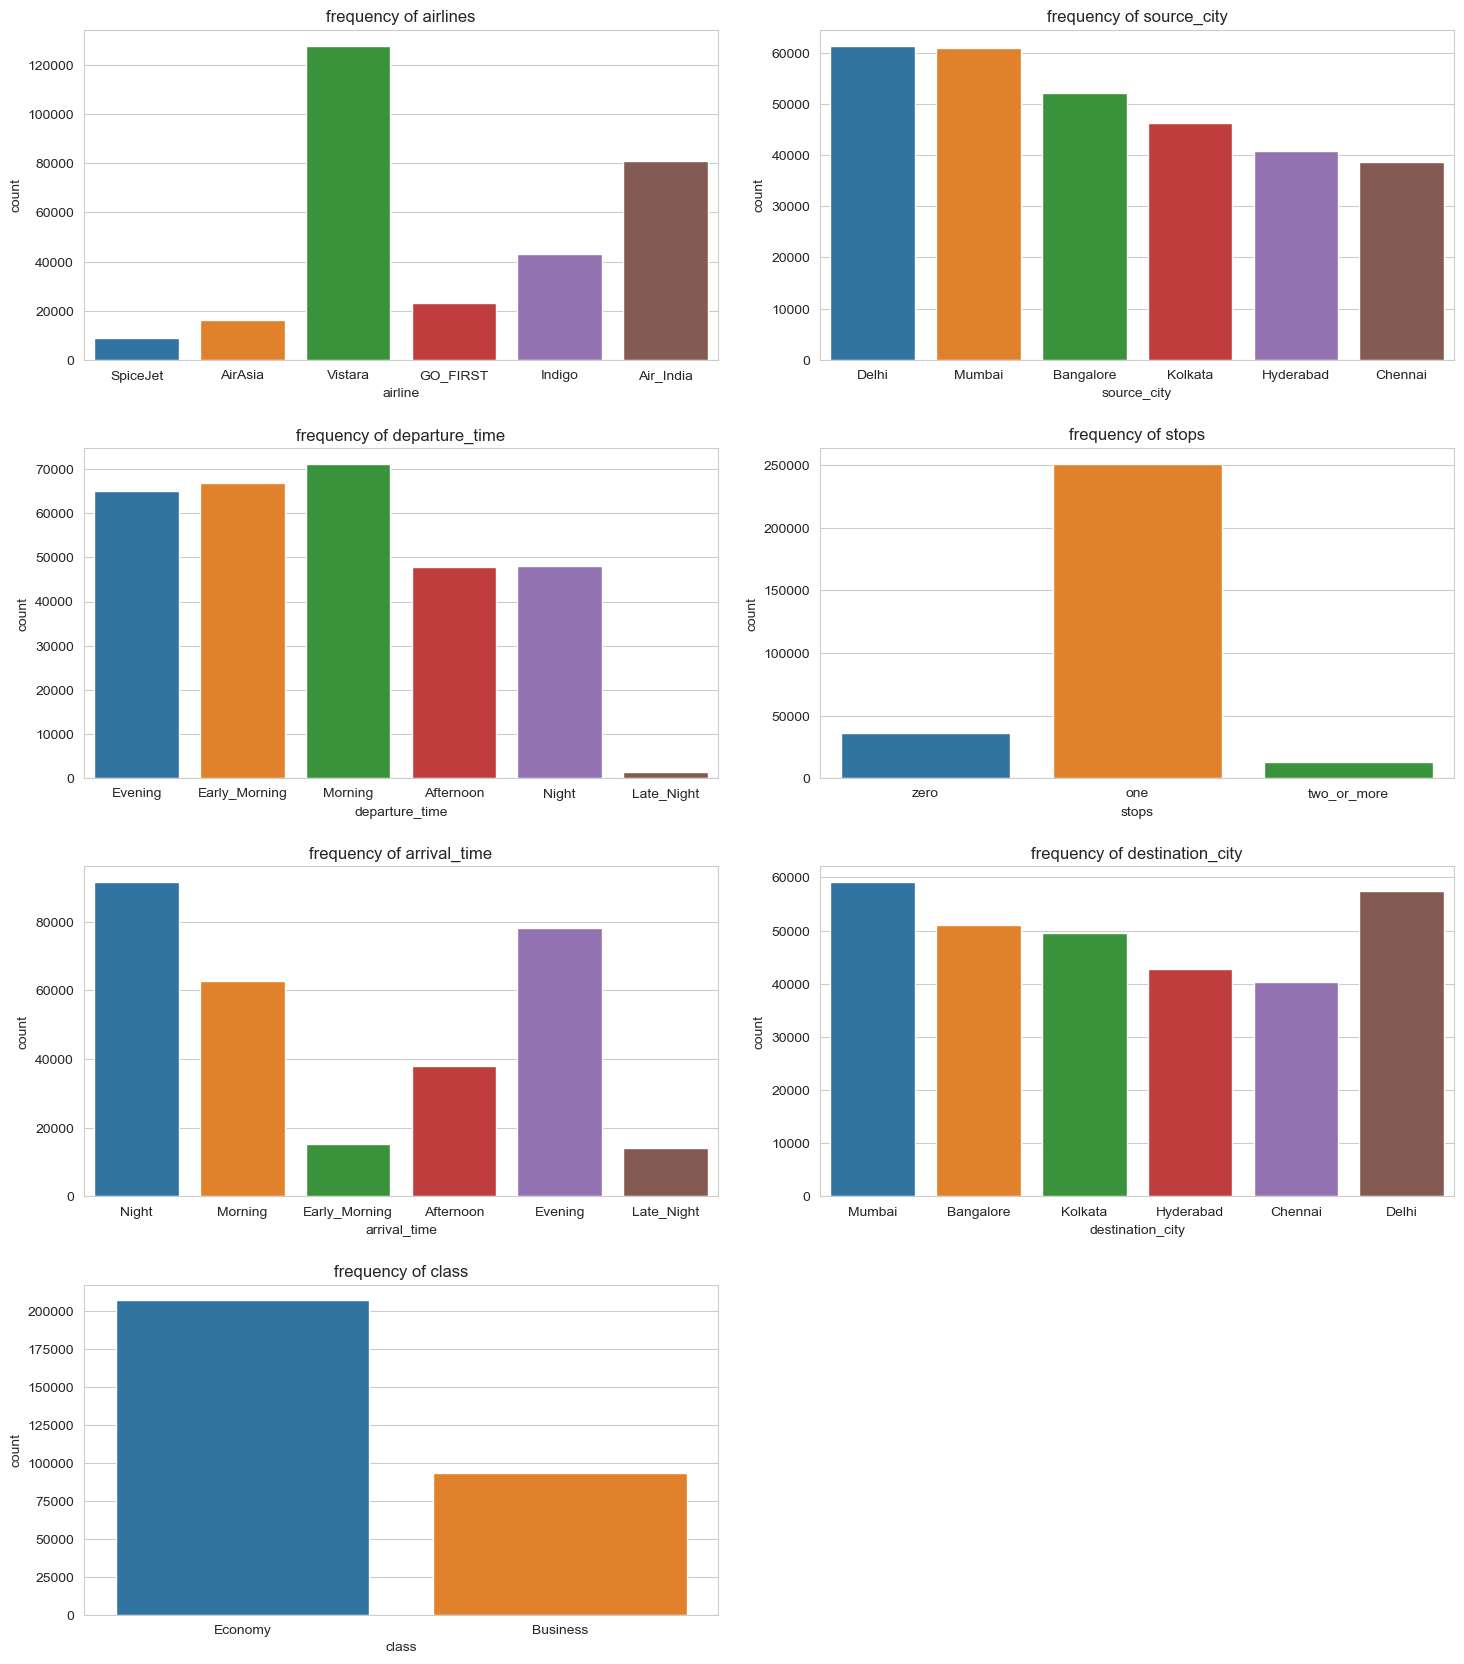

In [15]:

plt.figure(figsize =(15,17))


#for airline
plt.subplot(4,2,1) #row-4, col - 2, plot-1
sns.countplot( x = df['airline'], data = df)
plt.title("frequency of airlines")

#for source_city
plt.subplot(4,2,2) #row-4, col - 2, plot-2
sns.countplot( x = df['source_city'], data = df)
plt.title("frequency of source_city")

#for departure_time
plt.subplot(4,2,3) #row-4, col - 2, plot-3
sns.countplot( x = df['departure_time'], data = df)
plt.title("frequency of departure_time")

#for stops
plt.subplot(4,2,4) #row-4, col - 2, plot-4
sns.countplot( x = df['stops'], data = df)
plt.title("frequency of stops")

#for arrival_time
plt.subplot(4,2,5) #row-4, col - 2, plot-5
sns.countplot( x = df['arrival_time'], data = df)
plt.title("frequency of arrival_time")


#for destination_city
plt.subplot(4,2,6) #row-4, col - 2, plot-5
sns.countplot( x = df['destination_city'], data = df)
plt.title("frequency of destination_city")

#for class
plt.subplot(4,2,7) #row-4, col - 2, plot-5
sns.countplot( x = df['class'], data = df)
plt.title("frequency of class")

plt.tight_layout(pad= 2.0)
plt.show()

### How ticket price varies for different Airline Companies with respect to Economy and Business Class

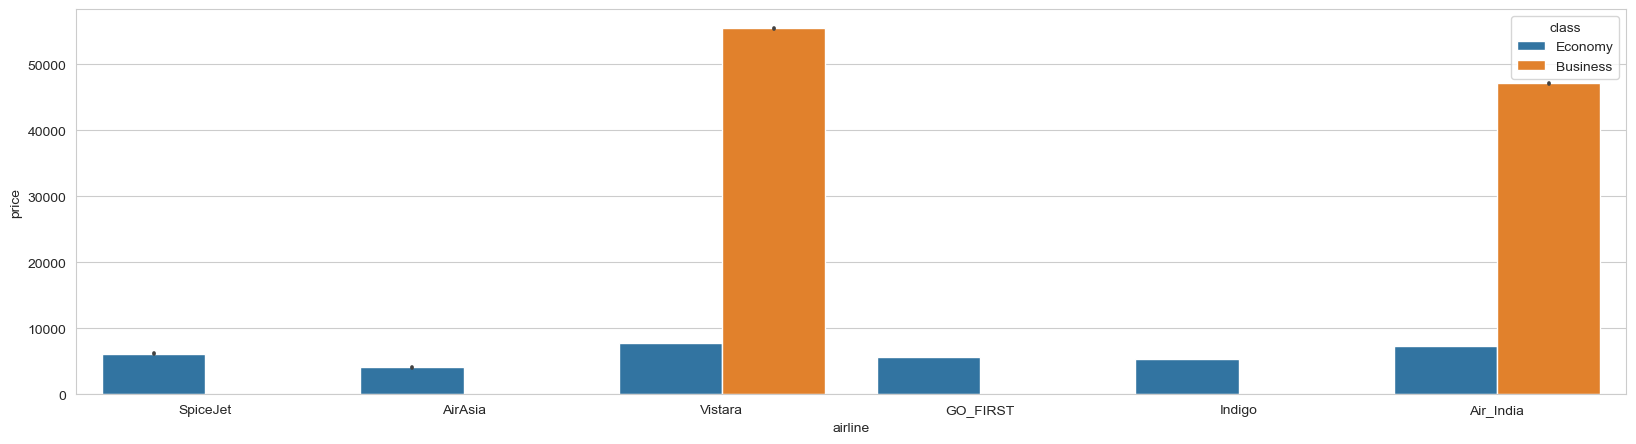

In [16]:
plt.figure(figsize=(20,5))
sns.barplot(x ='airline', y = 'price', data = df, hue = 'class')
plt.show()


<p>📌<b> only Vistara and Air_India have Business Class. Air_India Business class ticket price is lower than Vistara. </b> </p>

### Does Price Varies with Airlines?

compare price for different class individually as price has a great impact as per class

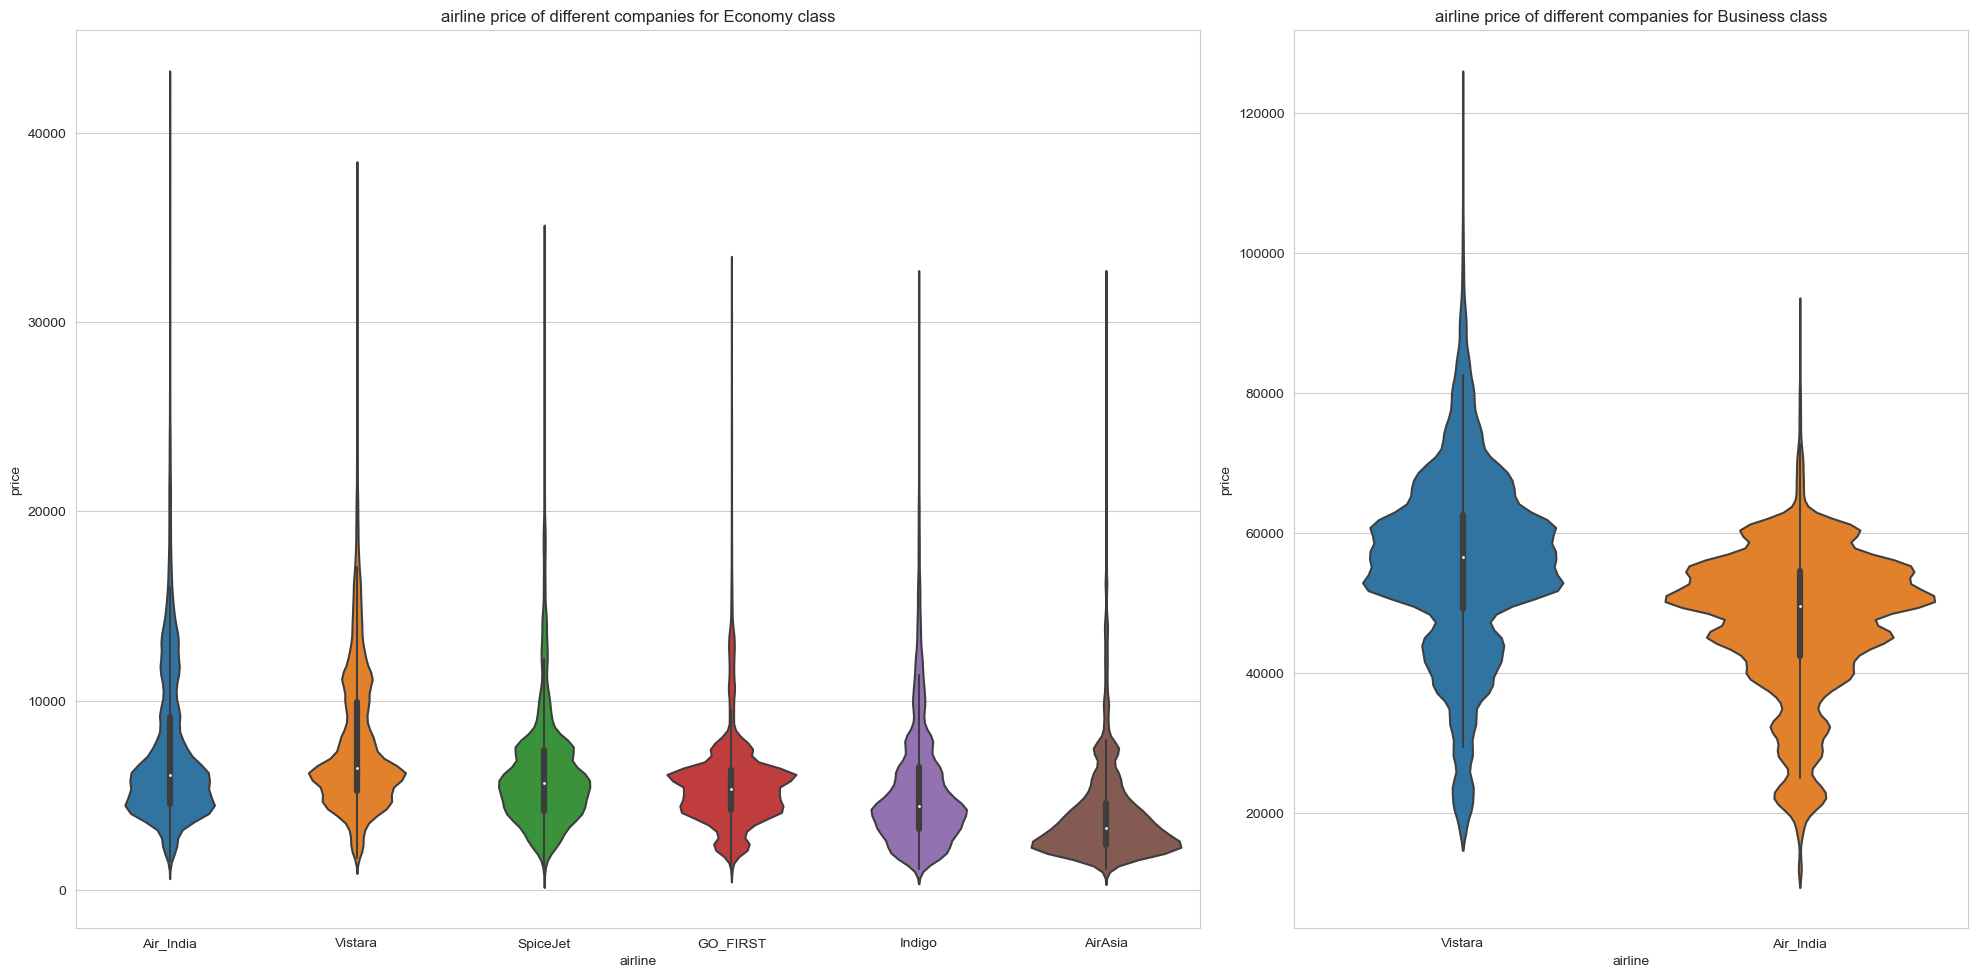

In [17]:
fig, axs = plt.subplots(1, 2, gridspec_kw={'width_ratios': [5, 3]}, figsize = (20,10)) #graph ratio: first graph will take space 5 and other 3

sns.violinplot( y ='price', x = 'airline', 
               data = df.loc[df['class']=='Economy'].sort_values('price', ascending = False),
               kind = 'boxen', ax = axs[0])
axs[0].set_title("airline price of different companies for Economy class")


sns.violinplot( y ='price', x = 'airline', 
               data = df.loc[df['class']=='Business'].sort_values('price', ascending = False),
               kind = 'boxen', ax = axs[1])
axs[1].set_title("airline price of different companies for Business class")

plt.tight_layout(pad = 1.5)
plt.show()

 <p> 📌<b>There are slight differences between each companies on this graph, AirAia serves the cheapest airfare comparing to other compines for economy class. Vistara is more expensive than the Air_india for Business Class </b> </p>.

### How the price affected when the ticket had purchased 1 t0 2 days earlier

In [18]:
df.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

In [19]:
#perform aggregation

df_temp = df.groupby(['days_left'])['price'].mean().reset_index()
df_temp[0:5]

,days_left,price
0,1,21591.867151
1,2,30211.299801
2,3,28976.083569
3,4,25730.905653
4,5,26679.773368


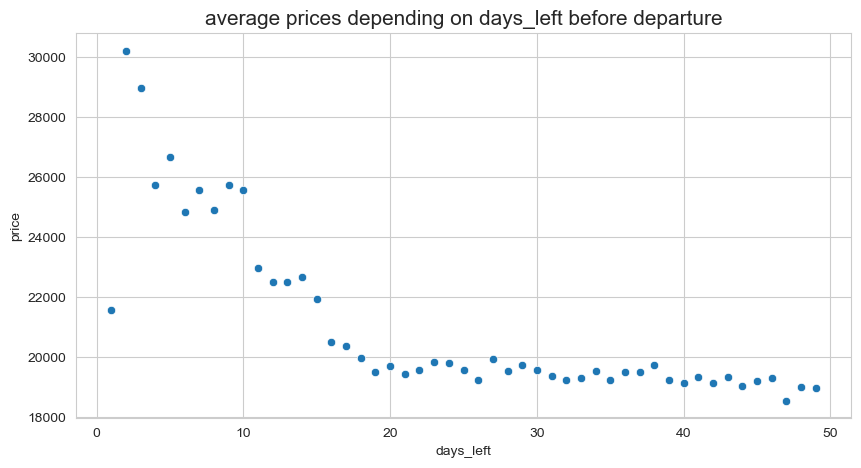

In [20]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = 'days_left', y = 'price', data = df_temp)
plt.title("average prices depending on days_left before departure", fontsize = 15)
plt.show()

 <p> 📌<b>Most of the cases, we can't find ticket before 1 day earlier. Price is higher if 2 days left compare to 1 days. Reason might be selling the unsold tickets. Price is low and constant in between 20 to 50 days </b> </p>.
 

we have segmented the scatter plots into 3. Where days_left(1), days_left(2 to 20) and days_left(20 to 50) to draw regression lines.
Here, we filter it out for days_left(1)

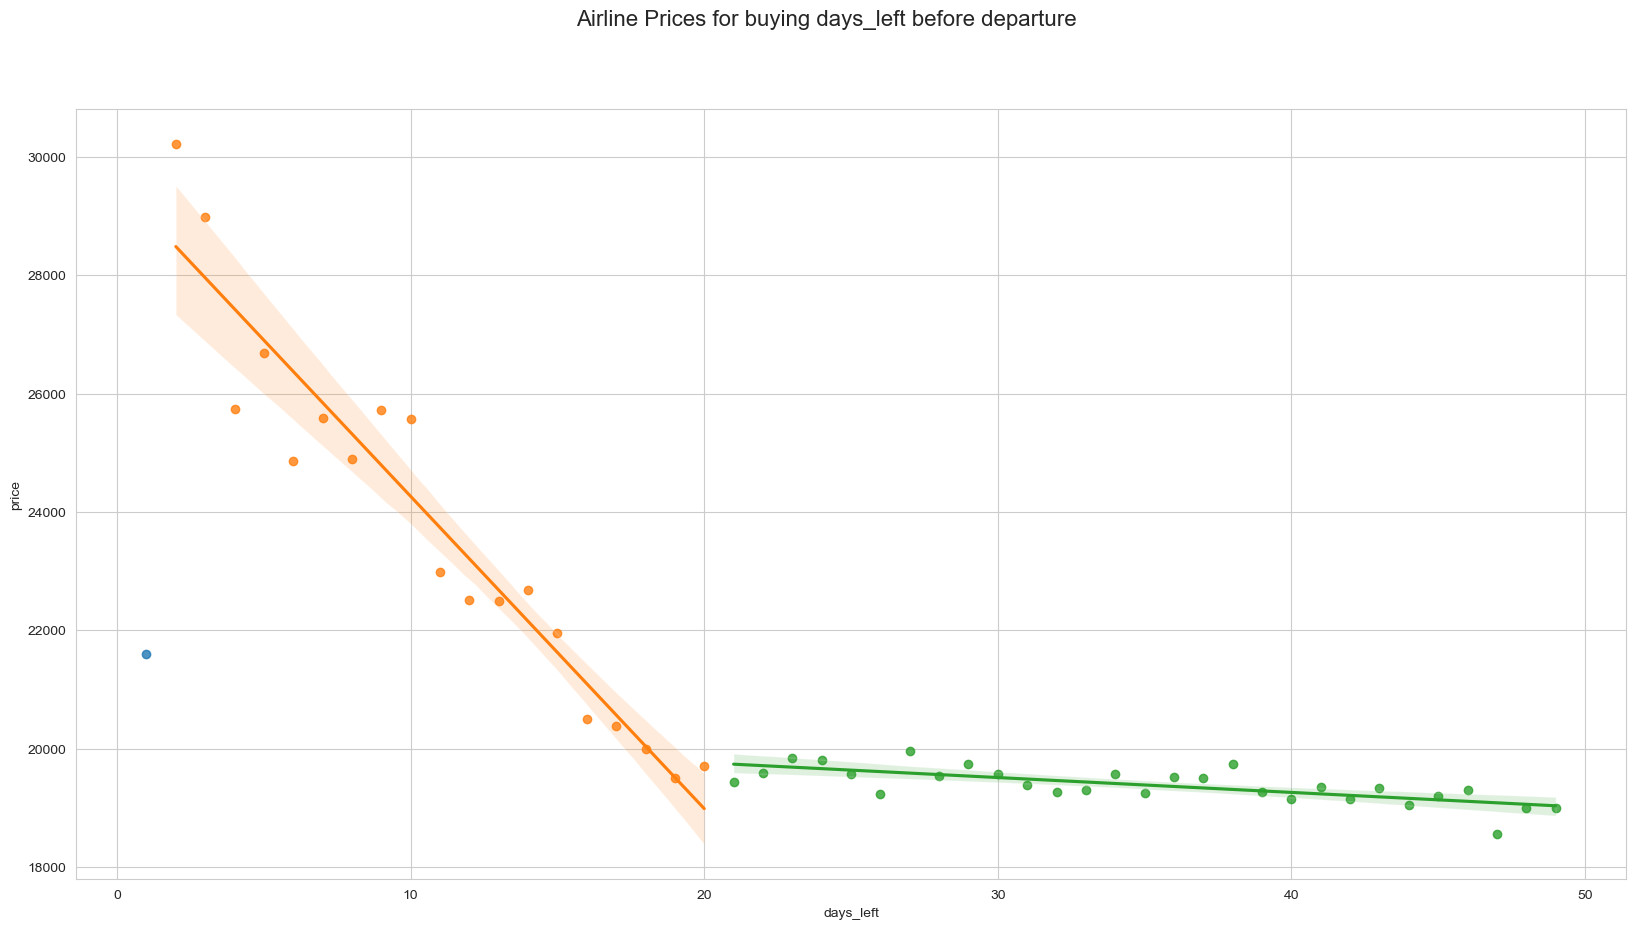

In [21]:
plt.figure(figsize = (20,10)).suptitle("Airline Prices for buying days_left before departure", fontsize = 16)

ax = plt.axes()

sns.regplot( x = df_temp.loc[df_temp['days_left']==1].days_left,
            y = df_temp.loc[df_temp['days_left']==1].price, fit_reg = False, ax =ax)

sns.regplot( x = df_temp.loc[(df_temp['days_left']>1) & (df_temp['days_left']<=20)].days_left,
            y = df_temp.loc[(df_temp['days_left']>1) & (df_temp['days_left']<=20)].price, fit_reg = True, ax =ax)

sns.regplot( x = df_temp.loc[df_temp['days_left']>20].days_left,
            y = df_temp.loc[df_temp['days_left']>20].price, fit_reg = True, ax =ax)

plt.show()

It is clearly showcasing, price varies depending on days left. And can be represented by three segments. It's worth to buy 20 - 50 days earlier of departure.

📌 The graph highlights how the prices rise slowly and then drastically start rising 20 days before the flight, but fall just one day before the flight up to three times cheaper. This can be explain by the fact the companies want to fill their empty seats and thus lower the prices of the tickets to ensure the planes remains full.

### Does price change with the duration of flight?

In [22]:
df_temp = df.groupby(['duration'])['price'].mean().reset_index()
df_temp

,duration,price
0,0.83,1973.557692
1,0.92,2003.538462
2,1.00,2266.063660
3,1.08,2589.311031
4,1.17,2632.209375
...,...,...
471,44.50,32439.000000
472,45.83,25851.333333
473,47.08,17223.000000
474,47.75,31291.500000


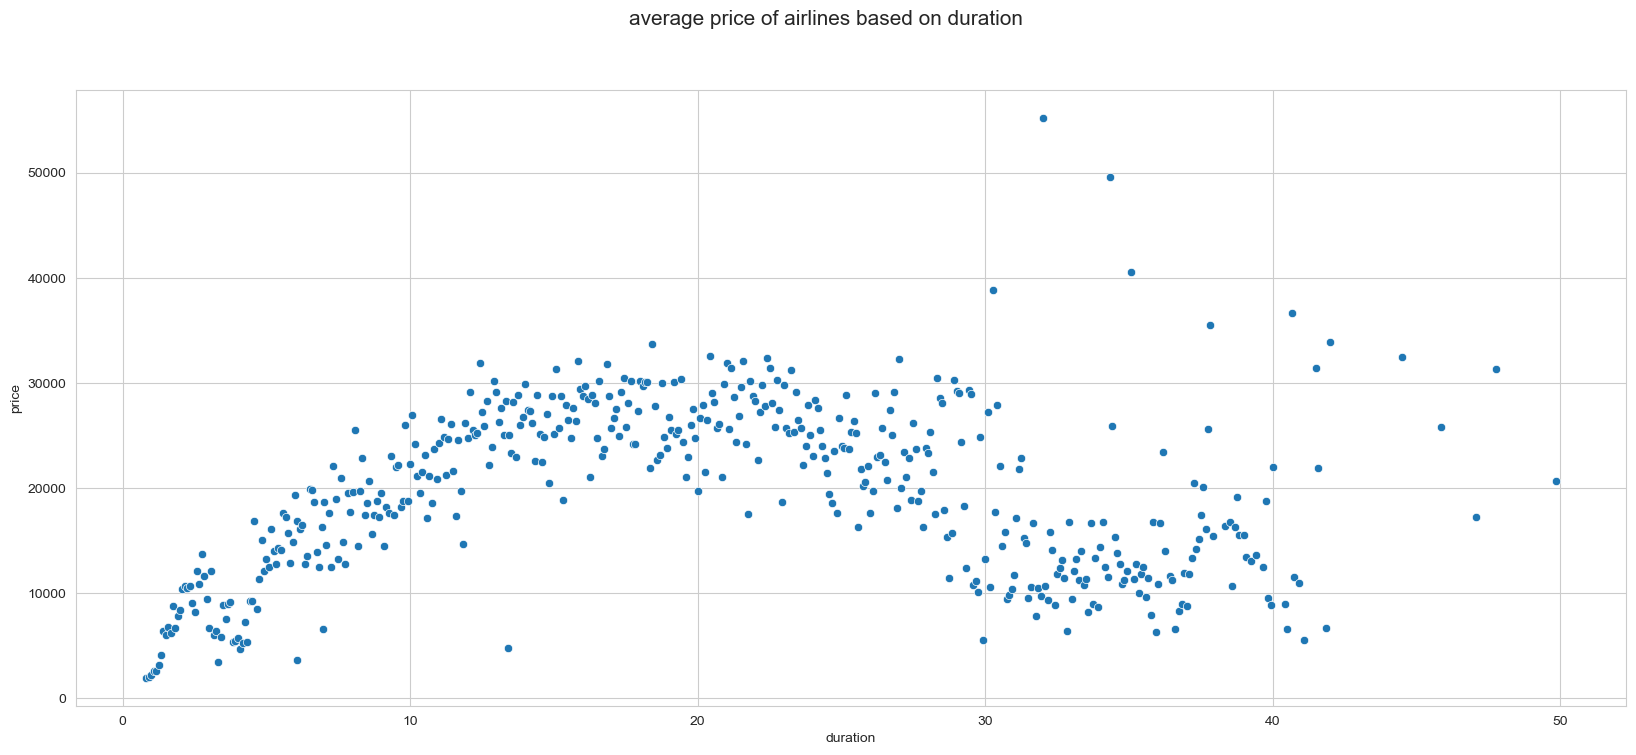

In [23]:
plt.figure(figsize = (20,8)).suptitle("average price of airlines based on duration", fontsize = 15)

sns.scatterplot(x='duration', y= "price", data = df_temp)
plt.show()

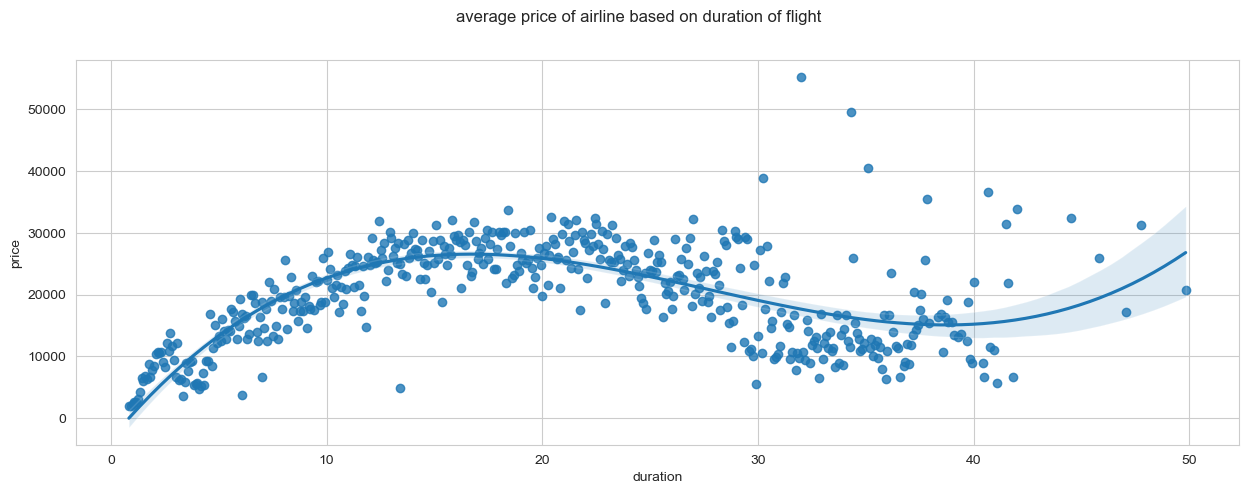

In [24]:
plt.figure(figsize=(15,5)).suptitle("average price of airline based on duration of flight")

#ax = sns.scatterplot( x = 'duration', y= 'price', data = df_temp)
ax = sns.regplot( x = 'duration', y= 'price', data = df_temp, order = 3) #three degree polynomial regression
plt.show()

📌 It clearly shows that line is not linear. Price is getting high as the duration increases and reaches at pick. Later it drops after 20 hours of duration.

### Does ticket price change based on Departure Time and Arrival Time

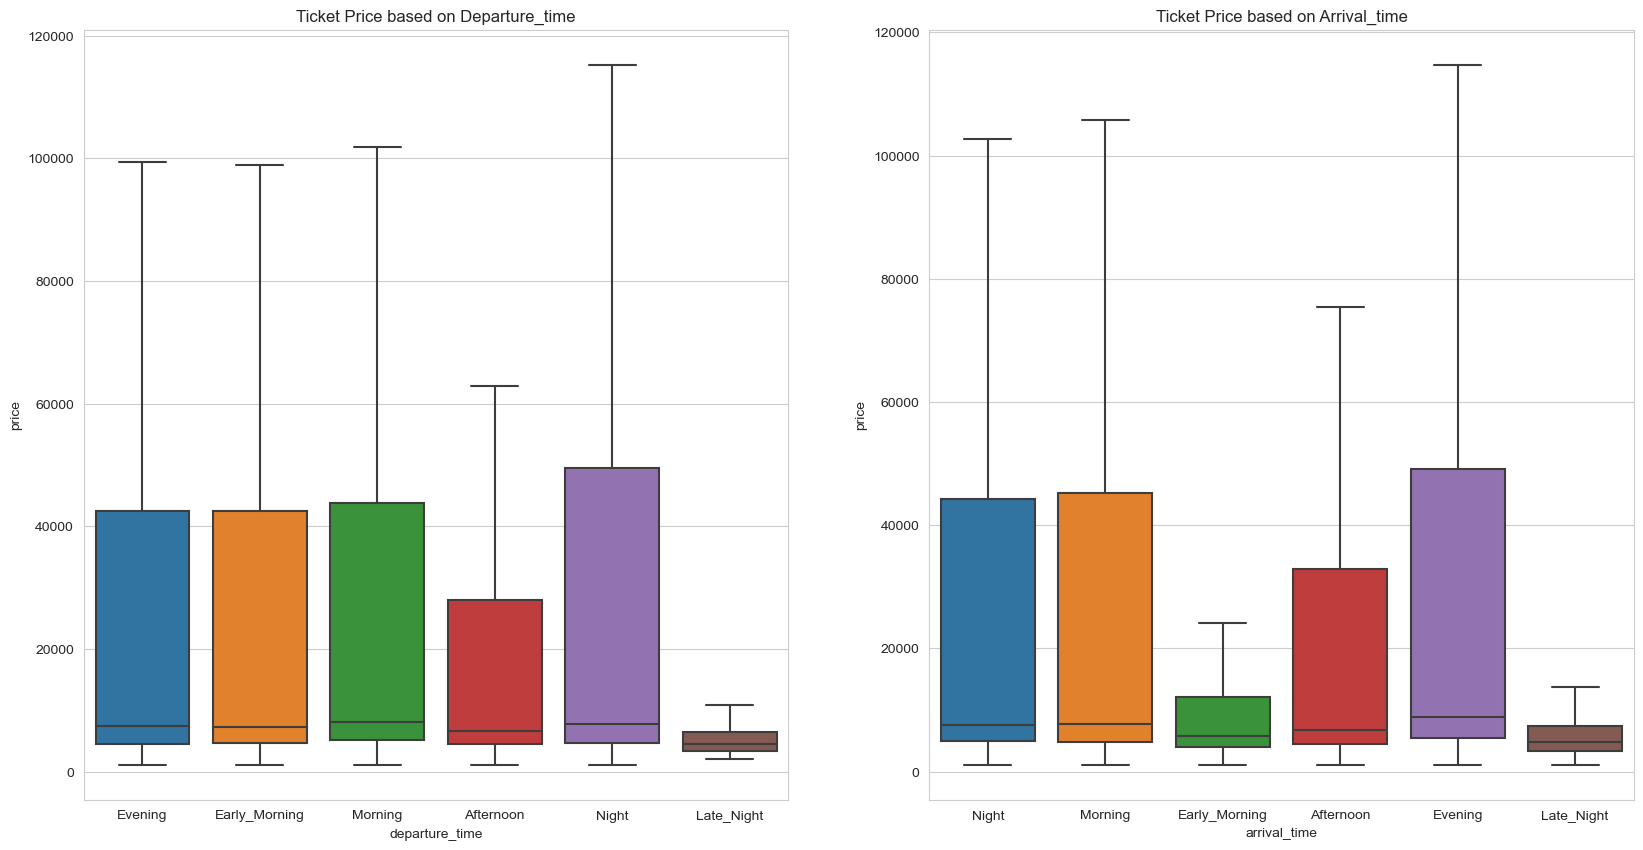

In [25]:
plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
ax = sns.boxplot( x = 'departure_time', y = 'price', data =df, showfliers = False) #showfliers = False to avoid outiliers
ax.set_title("Ticket Price based on Departure_time")

plt.subplot(1,2,2)
ax1= sns.boxplot( x = 'arrival_time', y = 'price', data =df, showfliers = False) #showfliers = False to avoid outiliers
ax1.set_title("Ticket Price based on Arrival_time")

plt.show()

📌 It clearly shows that late_night ticket price both departure and arrival is lower. Airline ticket at Night for departure has high demand and the price sometimes higher compare to others. It shows same response in case of arrival_time but for Evening time.

### How price changes with a change in source and destination?

<Figure size 1500x2000 with 0 Axes>

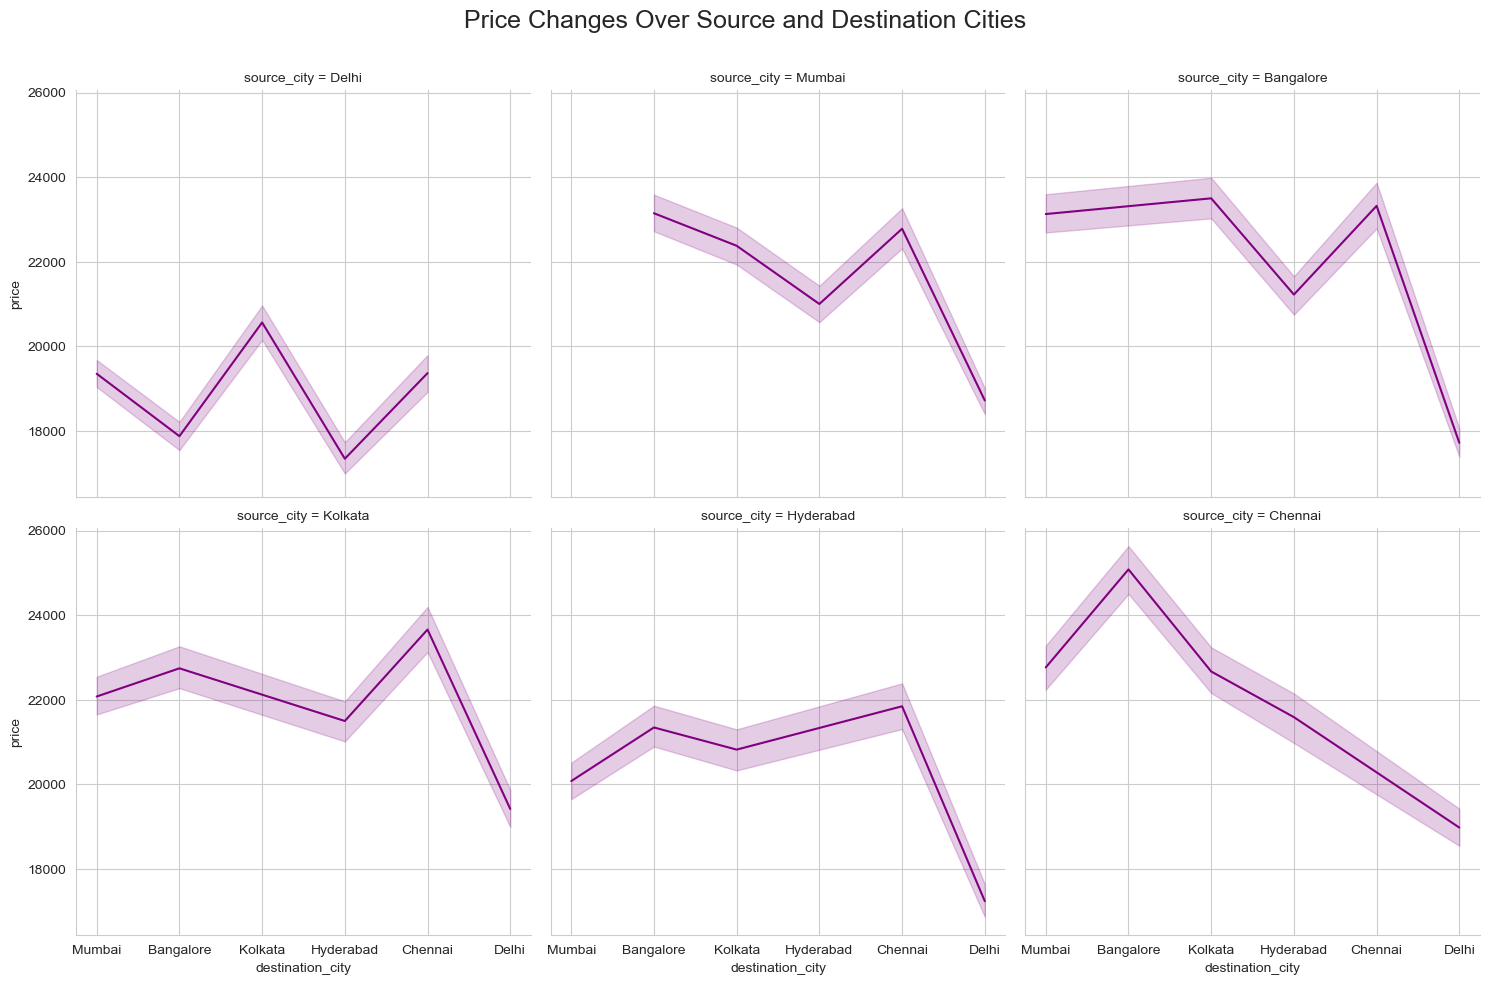

In [27]:
plt.figure(figsize = (15, 20))

ax = sns.relplot(col = 'source_city', x = 'destination_city', y = 'price', 
                 kind = 'line', data =df,
                 col_wrap = 3, color = 'purple')
ax.fig.subplots_adjust(top = 0.9)
ax.fig.suptitle("Price Changes Over Source and Destination Cities", fontsize = 18)
plt.show()

📌Delhi flight cost is lower as a destination/source city from most of the source city. Reason might be the capital city or large airport. Moreover, it can be situated in a good position geographically from other cities. Apart from Delhi, Hyderabad is showecasing lower price for most of the cities.

### Does number of stops influce the prices?

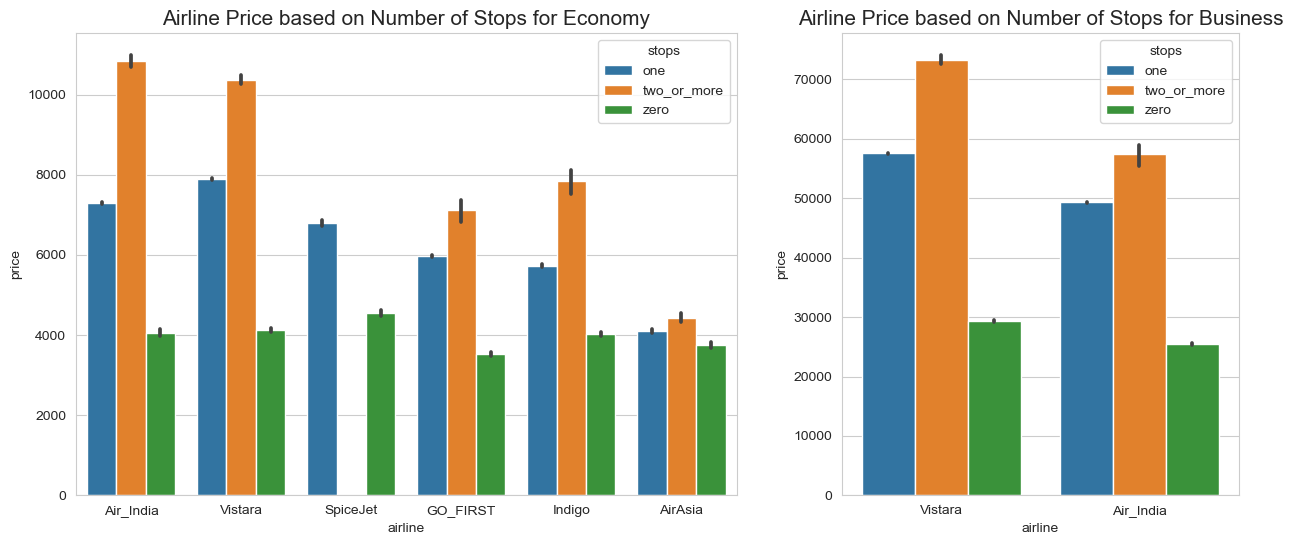

In [28]:
fig, axs = plt.subplots(1, 2, gridspec_kw= {'width_ratios': [5,3]}, figsize = (15,6))
sns.barplot( x = 'airline', y = 'price', hue = 'stops', 
            data = df.loc[df['class']=='Economy'].sort_values('price', ascending = False),
            ax = axs[0])
axs[0].set_title("Airline Price based on Number of Stops for Economy", fontsize = 15)

sns.barplot( x = 'airline', y = 'price', hue = 'stops', 
            data = df.loc[df['class']=='Business'].sort_values('price', ascending = False),
            ax = axs[1])
axs[1].set_title("Airline Price based on Number of Stops for Business", fontsize = 15)

plt.show()


📌Airline price is lower for zero stops in both Economy and Business Class. Price is consistent in case of AirAsia with respect to stops and cost is also cheapest

### What variable influnces most the price?

using correlation

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [32]:
def preprocessing(df):

    #ordinal numerical conversion

    stops_dict = {'zero' : 0, 'one' : 1, 'two_or_more' : 2}
    df['stops'] = df['stops'].replace(stops_dict).astype(int)
    
    class_dict = {'Economy' : 0, 'Business' : 1}
    df['class'] = df['class'].replace(class_dict).astype(int)

    #onehot encoding using dummy variable
    dummies_variable = ['airline', 'source_city', 'departure_time', 'arrival_time', 'destination_city']
    dummies = pd.get_dummies(df[dummies_variable], drop_first= True)

    df = pd.concat([df, dummies], axis = 1) #coloumnwise

    #drop the columns which have already encoded
    df = df.drop(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time', 'arrival_time', 'destination_city'], axis = 1)
    return df

In [33]:
df_preprocessed = preprocessing(df)
df_preprocessed

,stops,class,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,...,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,0,0,2.17,1,5953,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,2.33,1,5953,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,2.17,1,5956,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,0,2.25,1,5955,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,2.33,1,5955,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,69265,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
300149,1,1,10.42,49,77105,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
300150,1,1,13.83,49,79099,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
300151,1,1,10.00,49,81585,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0


In [34]:
df_preprocessed.corr()

,stops,class,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,...,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
stops,1.000000,0.001027,0.468059,-0.008540,0.119648,0.060215,-0.033363,-0.172133,-0.087293,0.098758,...,-0.018657,0.070912,-0.018544,-0.045666,0.017965,0.060865,-0.104565,0.029073,0.062722,-0.046849
class,0.001027,1.000000,0.138710,-0.013039,0.937860,0.124899,-0.194540,-0.275477,-0.118325,0.302116,...,-0.041974,0.032833,-0.086238,0.039745,0.008035,0.012331,-0.021200,0.007564,-0.012987,0.010573
duration,0.468059,0.138710,1.000000,-0.039157,0.204222,0.277283,-0.139380,-0.365953,0.008776,0.132430,...,0.010950,0.033094,-0.107301,0.122906,-0.064458,0.061271,-0.115412,0.065762,0.061440,-0.043900
days_left,-0.008540,-0.013039,-0.039157,1.000000,-0.091949,-0.022721,0.030408,0.007839,-0.024414,-0.007002,...,0.020204,-0.013737,0.026500,-0.003619,-0.004593,0.000456,0.006233,-0.000018,-0.003840,-0.004337
price,0.119648,0.937860,0.204222,-0.091949,1.000000,0.070041,-0.194179,-0.280882,-0.114019,0.360816,...,-0.060449,0.056408,-0.093602,0.030379,0.020344,0.018473,-0.052527,-0.008292,0.020956,0.010533
airline_Air_India,0.060215,0.124899,0.277283,-0.022721,0.070041,1.000000,-0.175687,-0.248781,-0.106858,-0.523242,...,-0.025510,-0.040356,-0.059937,0.066735,-0.001920,0.005760,-0.017354,0.010900,-0.006201,0.042490
airline_GO_FIRST,-0.033363,-0.194540,-0.139380,0.030408,-0.194179,-0.175687,1.000000,-0.118471,-0.050886,-0.249171,...,0.085654,-0.043881,0.100450,-0.063926,-0.000382,-0.059581,0.034305,-0.025814,-0.001016,0.026916
airline_Indigo,-0.172133,-0.275477,-0.365953,0.007839,-0.280882,-0.248781,-0.118471,1.000000,-0.072057,-0.352838,...,0.013864,0.007335,0.065025,-0.082781,-0.009271,0.018089,-0.002593,0.000244,0.033801,-0.031242
airline_SpiceJet,-0.087293,-0.118325,0.008776,-0.024414,-0.114019,-0.106858,-0.050886,-0.072057,1.000000,-0.151553,...,0.022834,-0.042162,0.003302,0.030808,0.013312,-0.002283,0.040668,-0.050272,0.029817,-0.000058
airline_Vistara,0.098758,0.302116,0.132430,-0.007002,0.360816,-0.523242,-0.249171,-0.352838,-0.151553,1.000000,...,-0.058766,0.091317,-0.135247,0.030260,0.024874,0.027766,-0.038389,0.035434,-0.030555,-0.016810


To visualize the linear relation between variables using correlation matrix

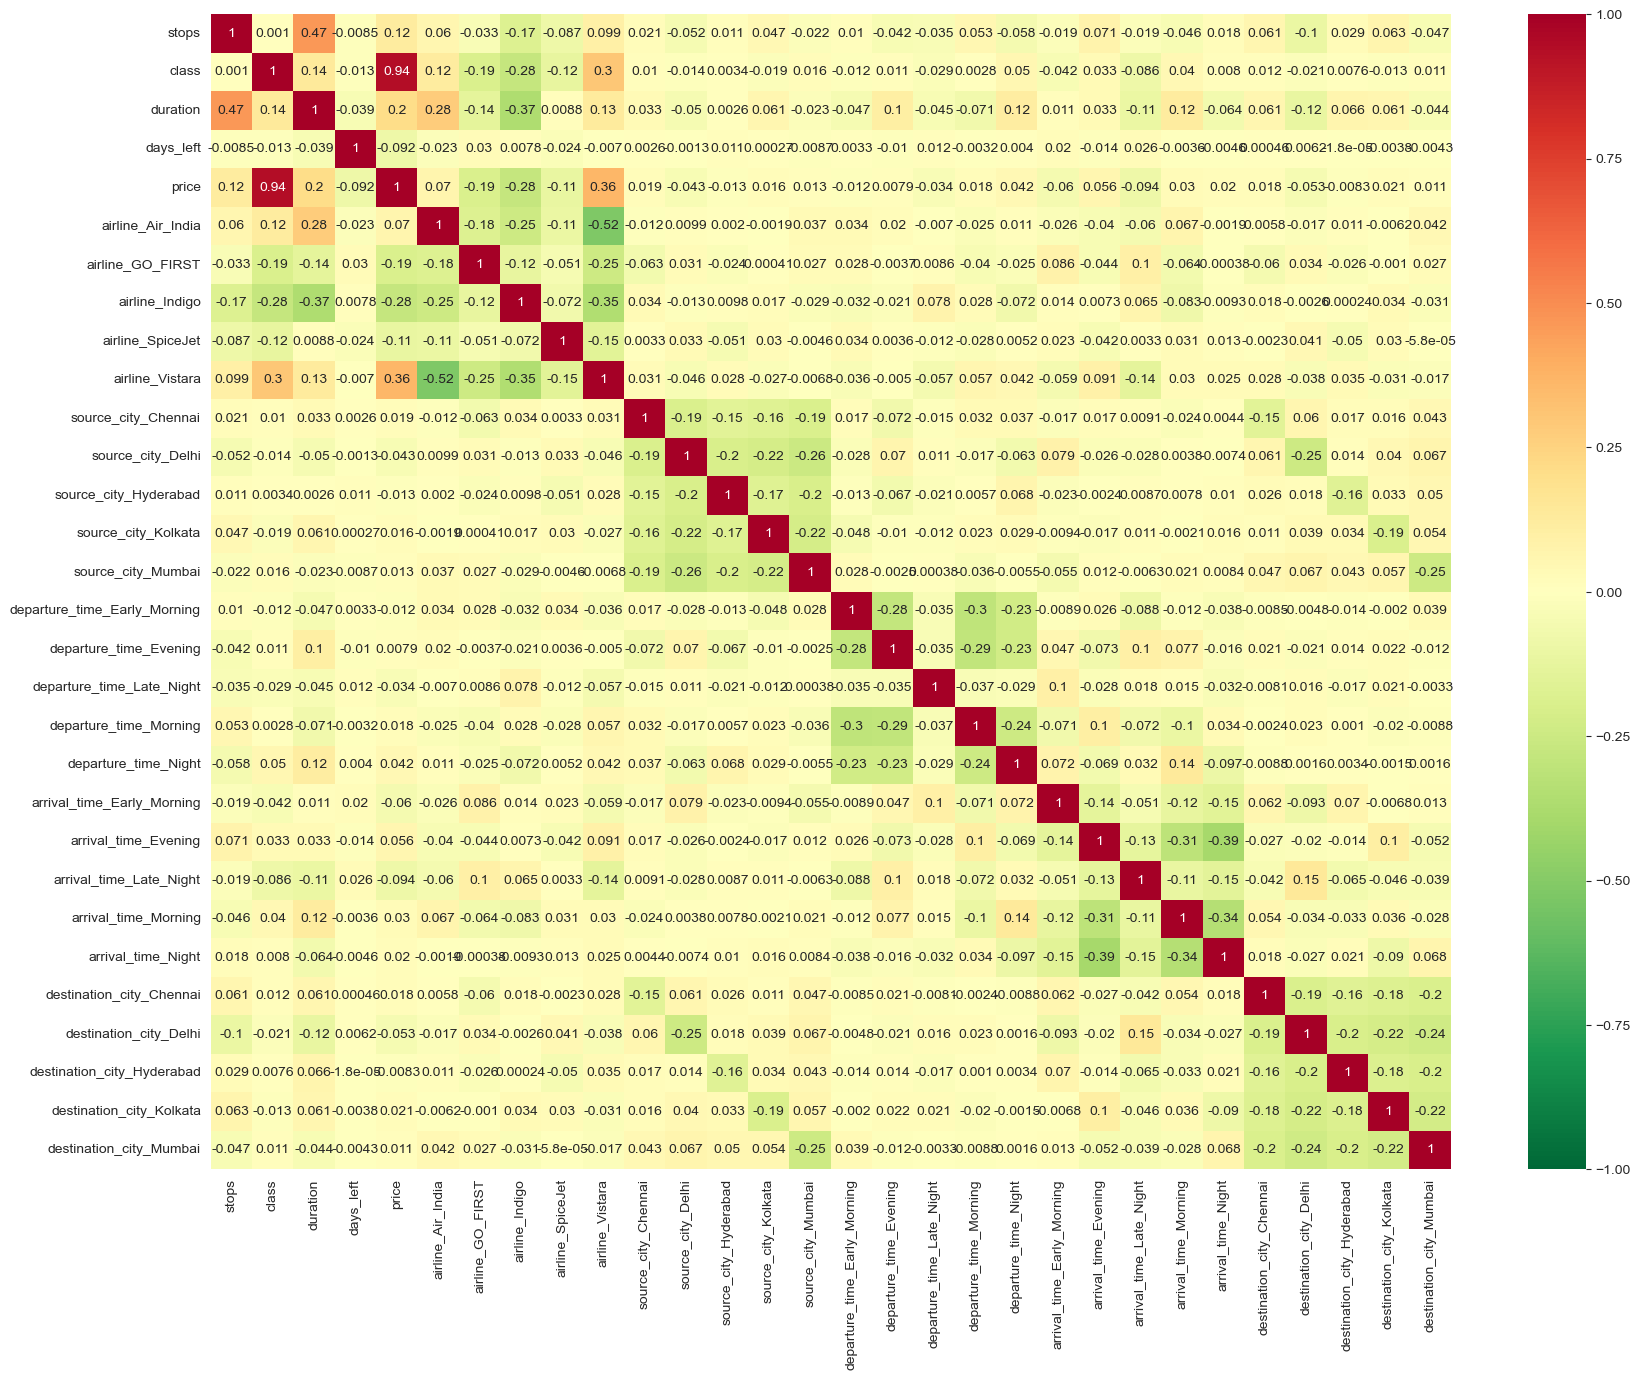

<Figure size 640x480 with 0 Axes>

In [46]:
plt.figure(figsize=(20,15))
#cmap = sns.diverging_palette(230, 30, as_cmap=True)
sns.heatmap(df_preprocessed.corr(), annot = True,
            vmin = -1.0, vmax = 1.0, center = 0, cmap = 'RdYlGn_r')
plt.show()
plt.savefig('heatmap.png', dpi=600, bbox_inches='tight')